# SpaCy

NLTK:
 - every possible technique
 - better for learning
 - no load time, no parse time
 - parsing happens on-demand
    
SpaCy
 - opinionated
 - usually one way to do something (only)
 - faster, more accurate (once it's loaded)
 - does all parsing at once

In [94]:
import spacy
import os
from collections import Counter
import pandas as pd

In [2]:
nlp = spacy.load('en_core_web_lg')

Information about language which spacy can understand. If you add a german model, it would try and understand german. 
There is a web trained model and a news trained model. web model comes from looking at web pages, slang, abbreviations, all sorts of nonsense. Web can recognise a much higher vocabulary than news. Large includes word vectors

In [18]:
dubliners = open('../Readings/Content/texts/dubliners.md').read()

In [19]:
dublinersParts = dubliners.split('\n##')

In [23]:
sisters = dublinersParts[1]

In [24]:
sistersDoc = nlp(sisters)

In [27]:
len(sistersDoc)

3959

In [31]:
lighted = sistersDoc[52]

In [36]:
file_names = os.listdir('../Readings')

fileDict = {}
for file_name in file_names:
    if file_name.endswith(".txt"):
        fileDict[file_name] = open('../readings/' + file_name, encoding='latin2').read()


In [37]:
fileDict.keys()

dict_keys(['book-and-the-brotherhood.txt', 'nuns-and-soldiers.txt', 'severed-head.txt', 'italian-girl.txt', 'nice-and-the-good.txt', 'red-and-the-green.txt', 'the-sea-the-sea-novel.txt', 'message-to-the-planet.txt', 'unicorn.txt', 'bell.txt', 'accidental-man.txt', 'philosopher-s-pupil.txt', 'time-of-the-angels.txt', 'henry-and-cato.txt', 'under-the-net.txt', 'sandcastle.txt', 'unofficial-rose.txt', 'flight-from-the-enchanter.txt', 'good-apprentice.txt', 'jackson-s-dilemma.txt', 'sacred-and-profane-love-machine.txt', 'bruno-s-dream.txt', 'fairly-honourable-defeat.txt', 'word-child.txt', 'the-black-prince-novel.txt'])

In [75]:
nlp.max_length=3500000
bookAndBrotherhood = nlp(fileDict['book-and-the-brotherhood.txt'])

## Generators

Generators are like lazy lists

 - it's not a list bydefault
 - but you can iterate voer it
 - yuo can use ```next()``` function to get the next one
 - you can also force it into a list with list()

In [41]:
sistersDoc.sents

In [47]:
list(sistersDoc.sents)[3]

If he was dead, I thought,
I would see the reflection of candles on the darkened blind for I knew
that two candles must be set at the head of a corpse.

# Named entity recognition (NER)

Probablistic means of detecting so-called named entities, people, organisations, artworks) things that have names
 - cardinal numbers
 - ordinal numbers
 - currenc (price)
 - places, 
 - names

In [50]:
for ent in sistersDoc.ents:
    print(ent, ent.label_)

third ORDINAL
night TIME
night TIME
two CARDINAL
Every night TIME
Euclid FAC
Catechism WORK_OF_ART
some
 CARDINAL
Cotter PERSON
first ORDINAL
one CARDINAL
Flynn PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Jack PERSON
Rosicrucian NORP
every morning TIME
winter DATE
summer DATE
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Cotter PERSON
Christmas DATE
The next morning TIME
Great Britain Street GPE
Drapery ORG
Two CARDINAL
July 1st, 1895 DATE
James Flynn PERSON
S.
Catherine's Church ORG
Meath Street FAC
sixty-five years DATE
R. I. P. PERSON
High Toast ORG
half CARDINAL
a week DATE
the day DATE
the night TIME
Irish NORP
Rome GPE
Latin NORP
Napoleon Bonaparte PERSON
Church ORG
Eucharist PRODUCT
the
Church ORG
the Post Office Directory ORG
one CARDINAL
Mass ORG
Cotter PERSON
Persia LOC
Nannie PERSON
first ORDINAL
Nannie PERSON
three CARDINAL
Eliza PERSON
Nannie PERSON
sherry PERSON
sherry PERSON
Eliza PERSON
Eliza PERSON
Eliza PERSON
O'Rourke PERSON

In [53]:
sistersPeople = [ent for ent in sistersDoc.ents if ent.label_ == 'PERSON']

In [60]:
# Doesn't work as each item isn't a string, it's a spacy Span
Counter(sistersPeople)

# Note that string keeps white text
sistersPeople[4].text, sistersPeople[4].string

('Cotter', 'Cotter ')

In [63]:
Counter([person.text.strip() for person in sistersPeople]).most_common(10)

[('Eliza', 13),
 ('Cotter', 12),
 ('Nannie', 6),
 ('James', 6),
 ("O'Rourke", 4),
 ('sherry', 3),
 ('Flynn', 1),
 ('Jack', 1),
 ('James Flynn', 1),
 ('R. I. P.', 1)]

In [64]:
sistersTimes = [ent for ent in sistersDoc.ents if ent.label_ == 'TIME']

# Spacy attributes

They have an _ if they are human readable and no _ if they are machine readable

In [66]:
sistersPeople[4].label


380

In [68]:
%timeit sistersPeople[4].label_ == sistersPeople[5].label_

126 ns ± 0.489 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [69]:
sistersTimes

[night,
 night,
 Every night,
 every morning,
 The next morning,
 the night,
 Sunday evening,
 one night]

In [71]:
[ent for ent in sistersDoc.ents if ent.label_ == 'GPE' or ent.label_ == 'LOC']

[Great Britain Street, Rome, Persia]

In [76]:
for token in sistersDoc[:200]:
    print(token, token.pos_, token.tag_)

  SPACE _SP
THE DET DT
SISTERS PROPN NNPS


 SPACE _SP
THERE PRON EX
was AUX VBD
no DET DT
hope NOUN NN
for ADP IN
him PRON PRP
this DET DT
time NOUN NN
: PUNCT :
it PRON PRP
was AUX VBD
the DET DT
third ADJ JJ
stroke NOUN NN
. PUNCT .
Night NOUN NN

 SPACE _SP
after ADP IN
night NOUN NN
I PRON PRP
had AUX VBD
passed VERB VBN
the DET DT
house NOUN NN
( PUNCT -LRB-
it PRON PRP
was AUX VBD
vacation NOUN NN
time NOUN NN
) PUNCT -RRB-
and CCONJ CC
studied VERB VBD

 SPACE _SP
the DET DT
lighted VERB VBN
square NOUN NN
of ADP IN
window NOUN NN
: PUNCT :
and CCONJ CC
night NOUN NN
after ADP IN
night NOUN NN
I PRON PRP
had AUX VBD
found VERB VBN
it PRON PRP

 SPACE _SP
lighted VERB VBN
in ADP IN
the DET DT
same ADJ JJ
way NOUN NN
, PUNCT ,
faintly ADV RB
and CCONJ CC
evenly ADV RB
. PUNCT .
If SCONJ IN
he PRON PRP
was AUX VBD
dead ADJ JJ
, PUNCT ,
I PRON PRP
thought VERB VBD
, PUNCT ,

 SPACE _SP
I PRON PRP
would VERB MD
see VERB VB
the DET DT
reflection NOUN NN
of ADP IN
candles NOUN NNS
on 

In [77]:
sistersVerbs = [token for token in sistersDoc if token.pos_ == 'VERB']

In [79]:
[(token, token.tag_) for token in sistersVerbs]

[(passed, 'VBN'),
 (studied, 'VBD'),
 (lighted, 'VBN'),
 (found, 'VBN'),
 (lighted, 'VBN'),
 (thought, 'VBD'),
 (would, 'MD'),
 (see, 'VB'),
 (darkened, 'VBN'),
 (knew, 'VBD'),
 (must, 'MD'),
 (set, 'VBN'),
 (said, 'VBN'),
 (thought, 'VBN'),
 (knew, 'VBD'),
 (gazed, 'VBD'),
 (said, 'VBD'),
 (sounded, 'VBN'),
 (sounded, 'VBD'),
 (filled, 'VBD'),
 (longed, 'VBD'),
 (look, 'VB'),
 (sitting, 'VBG'),
 (came, 'VBD'),
 (ladling, 'VBG'),
 (said, 'VBD'),
 (returning, 'VBG'),
 (would, 'MD'),
 (say, 'VB'),
 ('ll, 'MD'),
 (tell, 'VB'),
 (began, 'VBD'),
 (puff, 'VB'),
 (arranging, 'VBG'),
 (knew, 'VBD'),
 (used, 'VBD'),
 (talking, 'VBG'),
 (grew, 'VBD'),
 (said, 'VBD'),
 (think, 'VBP'),
 (say, 'VB'),
 (began, 'VBD'),
 (puff, 'VB'),
 (giving, 'VBG'),
 (saw, 'VBD'),
 (staring, 'VBG'),
 (said, 'VBD'),
 (gone, 'VBN'),
 ('ll, 'MD'),
 (hear, 'VB'),
 (said, 'VBD'),
 (told, 'VBN'),
 (passing, 'VBG'),
 (knew, 'VBD'),
 (continued, 'VBD'),
 (eating, 'VBG'),
 (interested, 'VBN'),
 (explained, 'VBD'),
 (taught,

In [81]:
[(token, token.lemma_, token.tag_) for token in sistersVerbs]

[(passed, 'pass', 'VBN'),
 (studied, 'study', 'VBD'),
 (lighted, 'light', 'VBN'),
 (found, 'find', 'VBN'),
 (lighted, 'light', 'VBN'),
 (thought, 'think', 'VBD'),
 (would, 'would', 'MD'),
 (see, 'see', 'VB'),
 (darkened, 'darken', 'VBN'),
 (knew, 'know', 'VBD'),
 (must, 'must', 'MD'),
 (set, 'set', 'VBN'),
 (said, 'say', 'VBN'),
 (thought, 'think', 'VBN'),
 (knew, 'know', 'VBD'),
 (gazed, 'gaze', 'VBD'),
 (said, 'say', 'VBD'),
 (sounded, 'sound', 'VBN'),
 (sounded, 'sound', 'VBD'),
 (filled, 'fill', 'VBD'),
 (longed, 'long', 'VBD'),
 (look, 'look', 'VB'),
 (sitting, 'sit', 'VBG'),
 (came, 'come', 'VBD'),
 (ladling, 'ladle', 'VBG'),
 (said, 'say', 'VBD'),
 (returning, 'return', 'VBG'),
 (would, 'would', 'MD'),
 (say, 'say', 'VB'),
 ('ll, 'will', 'MD'),
 (tell, 'tell', 'VB'),
 (began, 'begin', 'VBD'),
 (puff, 'puff', 'VB'),
 (arranging, 'arrange', 'VBG'),
 (knew, 'know', 'VBD'),
 (used, 'use', 'VBD'),
 (talking, 'talk', 'VBG'),
 (grew, 'grow', 'VBD'),
 (said, 'say', 'VBD'),
 (think, 'thi

In [83]:
Counter([token.lemma_ for token in sistersVerbs]).most_common(20)

[('say', 48),
 ('go', 17),
 ('know', 13),
 ('look', 13),
 ('would', 12),
 ('see', 12),
 ('think', 11),
 ('could', 10),
 ('find', 9),
 ('take', 9),
 ('smile', 7),
 ('make', 7),
 ('tell', 6),
 ('begin', 6),
 ('use', 6),
 ('feel', 6),
 ('bring', 6),
 ('will', 5),
 ('give', 5),
 ('fall', 5)]

In [90]:
encounter = dublinersParts[2]
encounterDoc = nlp(encounter)

In [97]:
def getCommonVerbs(doc):
    verbs = []
    for word in doc:
        if word.pos_ == 'VERB':
            verbs.append(word.lemma_)
    return dict(Counter(verbs).most_common(20))

In [98]:
storiesVerbs = { 'encounter': getCommonVerbs(encounterDoc), 'sisters': getCommonVerbs(sistersDoc) }

In [101]:
storiesVerbsDF = pd.DataFrame(storiesVerbs).fillna(0)

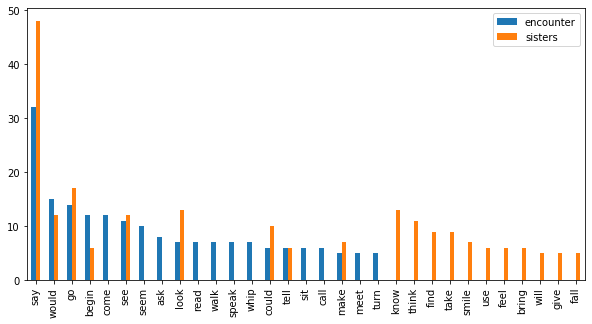

In [106]:
storiesVerbsDF.plot(kind='bar',figsize=(10,5))